In [1]:
from pycbc.detector import Detector
from astropy.utils import iers
from pycbc.waveform import get_td_waveform
import pylab
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

%matplotlib inline

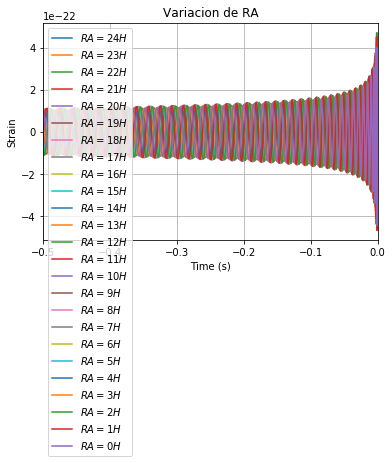

In [2]:
#Variación de ra

#Time, orientation and location of the source in the sky
#ra = 1.7   #Right Asenscion
dec = 1.7  #Declination
pol = 0.2  #Polarization
inc = 0    #Inclination
time = 1000000000   #GPS time

# We can calculate the antenna pattern for Hanford at
# the specific sky location
d = Detector("H1")
#Valores para 'ra'
val_ra = []
for i in reversed(range(0, 25, 1)):
    val_ra.append(i)

    
#x = []
#y = []
#z = []

for ra in val_ra:

# We get back the fp and fc antenna pattern weights.
    fp, fc = d.antenna_pattern(ra, dec, pol, time)
#print("Fp = {}, Fc = {}".format(fp, fc))

# These factors allow us to project a signal into what the detector would
# observe

## Generate a waveform
    hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

## Apply the factors to get the detector frame strain
    ht = fp * hp + fc * hc

#    x.append(ht.sample_times)
#    y.append(ht)
#    z.append(ra)

    pylab.plot(ht.sample_times, ht, label='$RA=%s H$' % ra)
pylab.title("Variacion de RA")
pylab.legend(loc='upper left')
pylab.grid()
pylab.xlabel('Time (s)')
#Zoom 
pylab.xlim( -0.5, 0 )
pylab.ylabel('Strain')
pylab.show()    

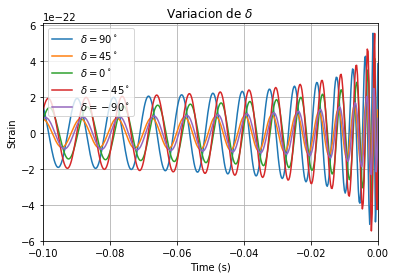

In [3]:
#Variación de dec

#Time, orientation and location of the source in the sky
ra = 1.7   #Right Asenscion
#dec = 1.7  #Declination
pol = 0.2  #Polarization
inc = 0    #Inclination
time = 1000000000   #GPS time

# We can calculate the antenna pattern for Hanford at
# the specific sky location
d = Detector("H1")

#Valores para 'dec'
val_dec = []
for i in reversed(range(-90, 135, 45)):
    val_dec.append(i)

for dec in val_dec:

# We get back the fp and fc antenna pattern weights.
    fp, fc = d.antenna_pattern(ra, dec, pol, time)
#print("Fp = {}, Fc = {}".format(fp, fc))

# These factors allow us to project a signal into what the detector would
# observe

## Generate a waveform
    hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

## Apply the factors to get the detector frame strain
    ht = fp * hp + fc * hc
    
    pylab.plot(ht.sample_times, ht, label='$\delta=%s ^\circ$' % dec)
pylab.title("Variacion de $\delta$ ")
pylab.legend(loc='upper left')
pylab.grid()
pylab.xlabel('Time (s)')
#Zoom 
pylab.xlim( -0.1, 0 )
pylab.ylabel('Strain')
pylab.show()      

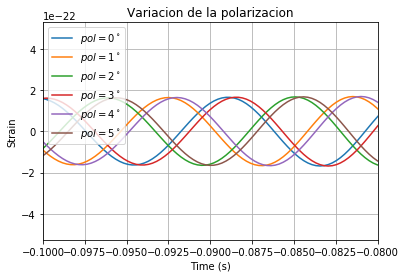

In [4]:
#Variación de pol

from numpy import math

#Time, orientation and location of the source in the sky
ra = 1.7   #Right Asenscion
dec = 1.7  #Declination
#pol = 0.2  #Polarization
inc = 0    #Inclination
time = 1000000000   #GPS time

# We can calculate the antenna pattern for Hanford at
# the specific sky location
d = Detector("H1")

#Valores para 'pol'
val_pol = []
for i in range(0, 6, 1):
    val_pol.append(i)

for pol in val_pol:

# We get back the fp and fc antenna pattern weights.
    fp, fc = d.antenna_pattern(ra, dec, pol, time)
#print("Fp = {}, Fc = {}".format(fp, fc))

# These factors allow us to project a signal into what the detector would
# observe

## Generate a waveform
    hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

## Apply the factors to get the detector frame strain
    ht = fp * hp + fc * hc
    
    pylab.plot(ht.sample_times, ht, label='$pol=%s ^\circ$' % pol)
pylab.title("Variacion de la polarizacion")
pylab.legend(loc='upper left')
pylab.grid()
pylab.xlabel('Time (s)')
#Zoom 
pylab.xlim( -0.1, -0.08 )
pylab.ylabel('Strain')
pylab.show()      

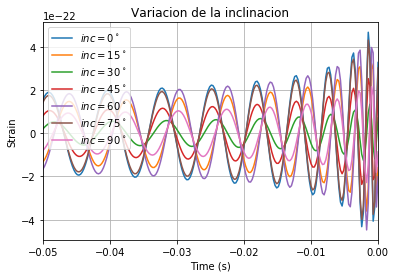

In [5]:
#Variación de inc

#Time, orientation and location of the source in the sky
ra = 1.7   #Right Asenscion
dec = 1.7  #Declination
pol = 0.2  #Polarization
#inc = 0    #Inclination
time = 1000000000   #GPS time

# We can calculate the antenna pattern for Hanford at
# the specific sky location
d = Detector("H1")

#Valores para 'inc'
val_inc = []
for i in range(0, 105, 15):
    val_inc.append(i)

for inc in val_inc:

# We get back the fp and fc antenna pattern weights.
    fp, fc = d.antenna_pattern(ra, dec, pol, time)
#print("Fp = {}, Fc = {}".format(fp, fc))

# These factors allow us to project a signal into what the detector would
# observe

## Generate a waveform
    hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

## Apply the factors to get the detector frame strain
    ht = fp * hp + fc * hc
    
    pylab.plot(ht.sample_times, ht, label='$inc=%s ^\circ$' % inc)
pylab.title("Variacion de la inclinacion")
pylab.legend(loc='upper left')
pylab.grid()
pylab.xlabel('Time (s)')
#Zoom 
pylab.xlim( -0.05, 0 )
pylab.ylabel('Strain')
pylab.show()      

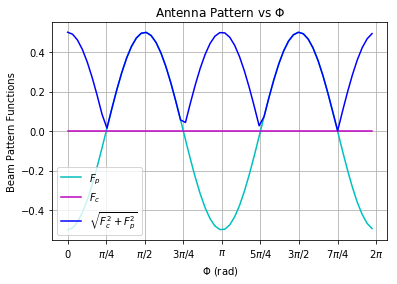

In [6]:
#Variacion de Phi

theta=0.5*math.pi
#phi=0.5*math.pi
psi=0.5*math.pi

#Phi varia entre 0 y 2*pi
values = np.arange( 0, 2*math.pi, 0.1)
        
fp=[]
fc=[]
f_rss=[]
phi_aux=[]

for phi in values:
    #Fp, Fc y F_rss
    fp_aux = 0.5*(1+math.cos(theta)**2)*math.cos(2*phi)*math.cos(2*psi)-math.cos(theta)*math.sin(2*phi)*math.sin(2*psi)
    fc_aux = 0.5*(1+math.cos(theta)**2)*math.cos(2*phi)*math.sin(2*psi)+math.cos(theta)*math.sin(2*phi)*math.cos(2*psi)
    f_rss_aux = ( fp_aux**2.0 + fc_aux**2.0 )**(0.5)
    
    fp.append(fp_aux)
    fc.append(fc_aux)
    phi_aux.append(phi)
    f_rss.append(f_rss_aux)
    
x=[ 0, 0.25*math.pi, 0.5*math.pi, 0.75*math.pi, math.pi, 1.25*math.pi, 1.5*math.pi, 1.75*math.pi, 2*math.pi ]
labels=['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$', '$5\pi/4$', '$3\pi/2$', '$7\pi/4$', '$2\pi$' ]

pylab.xticks(x, labels, rotation='horizontal')
pylab.plot(phi_aux, fp, label='$F_p$', color='c')
pylab.plot(phi_aux, fc, label='$F_c$', color='m')
pylab.plot(phi_aux, f_rss, label='$\sqrt{F_c^2+F_p^2} $', color='b')
pylab.title("Antenna Pattern vs $\Phi$")
pylab.legend(loc='best')
pylab.grid()
pylab.xlabel('$\Phi$ (rad)')
pylab.ylabel('Beam Pattern Functions')
pylab.show()

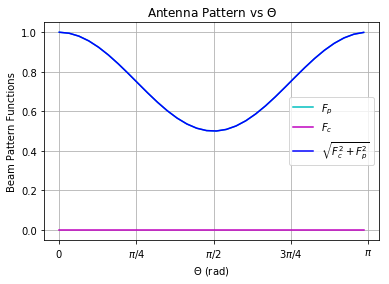

In [7]:
#Variacion de Theta

#theta=0.5*math.pi
phi=0.5*math.pi
psi=0.5*math.pi

#Theta varia entre 0 y pi
values = np.arange( 0, math.pi, 0.1)
        
fp=[]
fc=[]
f_rss=[]
theta_aux=[]

for theta in values:
    #Fp, Fc y F_rss
    fp_aux = 0.5*(1+math.cos(theta)**2)*math.cos(2*phi)*math.cos(2*psi)-math.cos(theta)*math.sin(2*phi)*math.sin(2*psi)
    fc_aux = 0.5*(1+math.cos(theta)**2)*math.cos(2*phi)*math.sin(2*psi)+math.cos(theta)*math.sin(2*phi)*math.cos(2*psi)
    f_rss_aux = ( fp_aux**2.0 + fc_aux**2.0 )**(0.5)
    
    fp.append(fp_aux)
    fc.append(fc_aux)
    theta_aux.append(theta)
    f_rss.append(f_rss_aux)

x=[ 0, 0.25*math.pi, 0.5*math.pi, 0.75*math.pi, math.pi ]
labels=['$0$', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$' ]

pylab.xticks(x, labels, rotation='horizontal')
pylab.plot(theta_aux, fp, label='$F_p$', color='c')
pylab.plot(theta_aux, fc, label='$F_c$', color='m')
pylab.plot(theta_aux, f_rss, label='$\sqrt{F_c^2+F_p^2} $', color='b')
pylab.title("Antenna Pattern vs $\Theta$")
pylab.legend(loc='best')
pylab.grid()
pylab.xlabel('$\Theta$ (rad)')
pylab.ylabel('Beam Pattern Functions')
pylab.show()

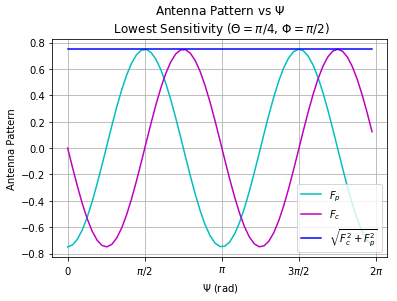

In [8]:
#Variacion de Psi

#Caso de menor incidencia
theta=0.25*math.pi #pi/4
phi=0.5*math.pi #pi/2
#psi=0.5*math.pi

#Psi varia entre 0 y 2*pi
values = np.arange( 0, 2*math.pi, 0.1)
        
fp=[]
fc=[]
f_rss=[]
psi_aux=[]

for psi in values:
    #Fp, Fc y F_rss
    fp_aux = 0.5*(1+math.cos(theta)**2)*math.cos(2*phi)*math.cos(2*psi)-math.cos(theta)*math.sin(2*phi)*math.sin(2*psi)
    fc_aux = 0.5*(1+math.cos(theta)**2)*math.cos(2*phi)*math.sin(2*psi)+math.cos(theta)*math.sin(2*phi)*math.cos(2*psi)
    f_rss_aux = ( fp_aux**2.0 + fc_aux**2.0 )**(0.5)
    
    fp.append(fp_aux)
    fc.append(fc_aux)
    psi_aux.append(psi)
    f_rss.append(f_rss_aux)

#Etiquetas del eje x    
x=[ 0, 0.5*math.pi, math.pi, 1.5*math.pi, 2*math.pi ]
labels=['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$' ]

pylab.xticks(x, labels, rotation='horizontal')
pylab.plot(psi_aux, fp, label='$F_p$', color='c')
pylab.plot(psi_aux, fc, label='$F_c$', color='m')
pylab.plot(psi_aux, f_rss, label='$\sqrt{F_c^2+F_p^2} $', color='b')
pylab.title("Antenna Pattern vs $\Psi$ \n Lowest Sensitivity ($\Theta=\pi/4$, $\Phi=\pi/2$)")
pylab.legend(loc='best')
pylab.grid()
pylab.xlabel('$\Psi$ (rad)')
pylab.ylabel('Antenna Pattern')
pylab.show()

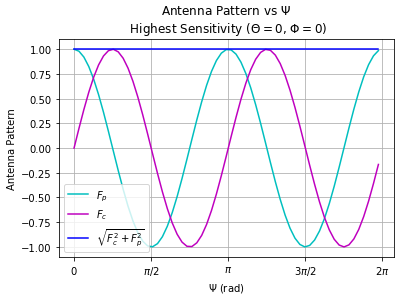

In [9]:
#Variacion de Psi

#Caso de mayor incidencia
theta=0
phi=0 
#psi=0.5*math.pi

#Psi varia entre 0 y 2*pi
values = np.arange( 0, 2*math.pi, 0.1)
        
fp=[]
fc=[]
f_rss=[]
psi_aux=[]

for psi in values:
    #Fp, Fc y F_rss
    fp_aux = 0.5*(1+math.cos(theta)**2)*math.cos(2*phi)*math.cos(2*psi)-math.cos(theta)*math.sin(2*phi)*math.sin(2*psi)
    fc_aux = 0.5*(1+math.cos(theta)**2)*math.cos(2*phi)*math.sin(2*psi)+math.cos(theta)*math.sin(2*phi)*math.cos(2*psi)
    f_rss_aux = ( fp_aux**2.0 + fc_aux**2.0 )**(0.5)
    
    fp.append(fp_aux)
    fc.append(fc_aux)
    psi_aux.append(psi)
    f_rss.append(f_rss_aux)

#Etiquetas del eje x    
x=[ 0, 0.5*math.pi, math.pi, 1.5*math.pi, 2*math.pi ]
labels=['$0$', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$' ]

pylab.xticks(x, labels, rotation='horizontal')
pylab.plot(psi_aux, fp, label='$F_p$', color='c')
pylab.plot(psi_aux, fc, label='$F_c$', color='m')
pylab.plot(psi_aux, f_rss, label='$\sqrt{F_c^2+F_p^2} $', color='b')
pylab.title("Antenna Pattern vs $\Psi$ \n Highest Sensitivity ($\Theta=0$, $\Phi=0$)")
pylab.legend(loc='best')
pylab.grid()
pylab.xlabel('$\Psi$ (rad)')
pylab.ylabel('Antenna Pattern')
pylab.show()